In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing libraries for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
#importing the dataset
df = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/DATA SCIENCE COURSE (Datasets)/mtcars.csv')

In [3]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.shape

(32, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [6]:
df.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [7]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


<AxesSubplot:>

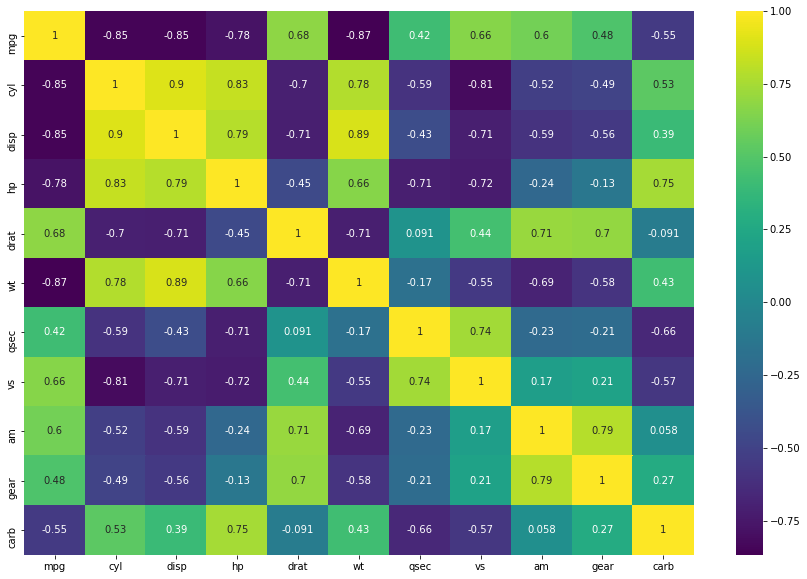

In [8]:
plt.figure(figsize = (15,10))
correlation = df.corr()
sns.heatmap(correlation , annot = True , cmap = 'viridis')

### Splitting the dataframe into training and testing data

In [9]:
#assigning independent variables to x and dependent variable or response variable to y
x = df.drop(['model','mpg'],axis = 1)
y = df['mpg']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [11]:
print("Dimension of x_train :",x_train.shape)
print("Dimension of x_test :",x_test.shape)
print("Dimension of y_train :",y_train.shape)
print("Dimension of y_test :",y_test.shape)

Dimension of x_train : (22, 10)
Dimension of x_test : (10, 10)
Dimension of y_train : (22,)
Dimension of y_test : (10,)


## Building a Linear Regression Model

In [12]:
lm = LinearRegression()
reg = lm.fit(x_train,y_train)

In [13]:
predictions = lm.predict(x_test)

In [14]:
predictions

array([29.9771945 , 27.00068044, 15.10200296, 18.31947695, 20.75703197,
       29.07806051, 28.47401398,  9.31240961, 22.81744929, 12.41497055])

In [15]:
y_test

27    30.4
2     22.8
12    17.3
4     18.7
5     18.1
25    27.3
17    32.4
16    14.7
28    15.8
23    13.3
Name: mpg, dtype: float64

Text(0, 0.5, 'Predicted Values')

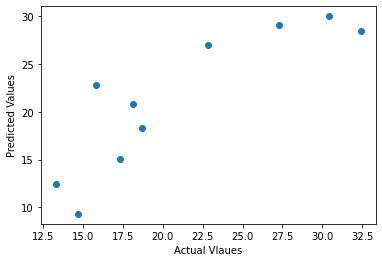

In [16]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Vlaues')
plt.ylabel('Predicted Values')

#### The scatter plot shows a high correlation between predicted and actual values

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.8853153652506633
MSE: 12.748915553341787
RMSE: 3.5705623581365704


In [18]:
coefficients = pd.DataFrame(lm.coef_,x.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
cyl,0.915069
disp,0.017635
hp,-0.018064
drat,0.843809
wt,-4.254534
qsec,0.927535
vs,1.950974
am,2.979242
gear,2.664435
carb,-0.878975


#### From the above table it can be inferred that wt,vs,am,gear,cyl highly affects the mpg value

In [19]:
yhat = reg.predict(x)

In [20]:
r2 = r2_score(y,yhat)
print("R-Squared =",r2)

R-Squared = 0.8357082444743951


#### R^2 value is 0.83 which means the model explains about 83% of the variation in our dependent variables